# GL(2,R)-orbit closures in the moduli space of translation surfaces

## Vincent Delecroix, September 12th 2023 (CIRM)

## 1. Motivation: study billiard in polygons

In [62]:
import itertools
from flatsurf import similarity_surfaces, polygons

In [63]:
# Euclidean triangle with angles (1, 3, 9) * pi / 13 and (3, 4, 13) * pi / 20
T_1_3_9 = polygons.triangle(1, 3, 9)
T_3_4_13 = polygons.triangle(3, 4, 13)

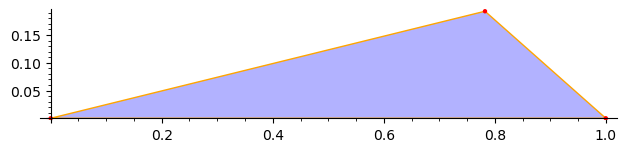

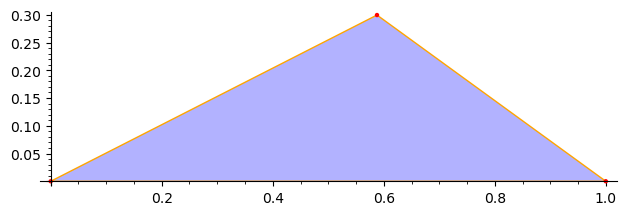

In [64]:
T_1_3_9.plot().show(aspect_ratio=1)
T_3_4_13.plot().show(aspect_ratio=1)

In [65]:
T_1_3_9

Polygon(vertices=[(0, 0), (1, 0), (-1/2*c^10 + 5*c^8 - 18*c^6 + 57/2*c^4 - 19*c^2 + 4, 1/2*c^9 - 4*c^7 + 10*c^5 - 17/2*c^3 + 5/2*c)])

In [66]:
T_1_3_9.base_ring()

Number Field in c with defining polynomial x^12 - 13*x^10 + 65*x^8 - 156*x^6 + 182*x^4 - 91*x^2 + 13 with c = 1.985417748196108?

In [67]:
T_3_4_13.base_ring()

Number Field in c0 with defining polynomial x^4 - 5*x^2 + 5 with c0 = 1.902113032590308?

In [68]:
S_1_3_9_sim = similarity_surfaces.billiard(T_1_3_9)
S_3_4_13_sim = similarity_surfaces.billiard(T_3_4_13)

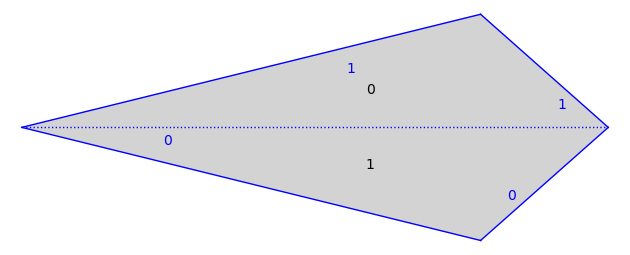

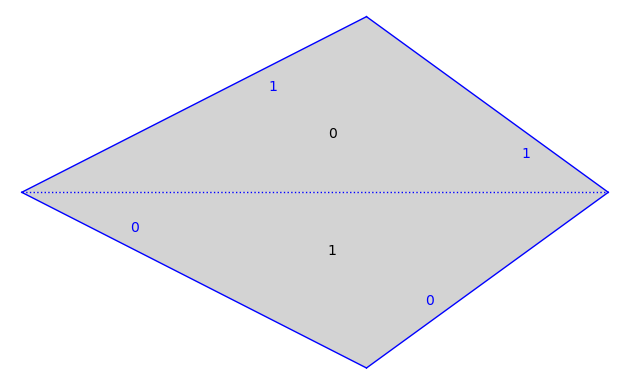

In [69]:
S_1_3_9_sim.plot().show(aspect_ratio=1)
S_3_4_13_sim.plot().show(aspect_ratio=1)

In [87]:
# (polygon_label, x, v)
v = S_3_4_13_sim.tangent_vector(0, (1/2, 1/8), (1/20,3/20))
L = v.straight_line_trajectory()

In [96]:
L.combinatorial_length()

511

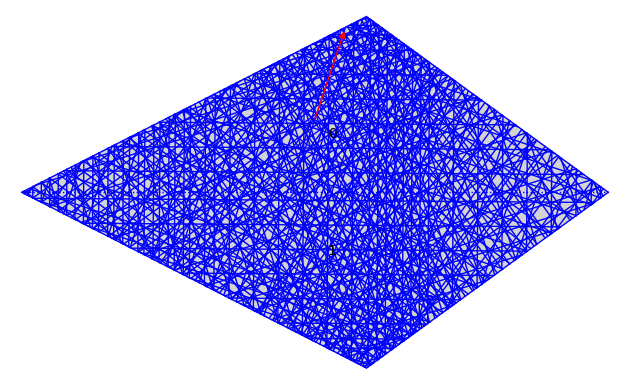

False


In [97]:
L.flow(100)
(S_3_4_13_sim.plot() + L.plot() + v.plot(color='red')).show(aspect_ratio=1)
print(L.is_closed())

## 2. Unfolding billiard and translation surfaces

In [8]:
# TODO:
# * is there a way to relabel on {0, 1, ...} directly?
# * why does the return type of .relabel()
S_1_3_9_tr = S_1_3_9_sim.minimal_cover('translation')
S_1_3_9_tr = S_1_3_9_tr.relabel({lab: i for i, lab in enumerate(S_1_3_9_tr.labels())})[0]
S_3_4_13_tr = S_3_4_13_sim.minimal_cover('translation')
S_3_4_13_tr = S_3_4_13_tr.relabel({lab: i for i, lab in enumerate(S_3_4_13_tr.labels())})[0]

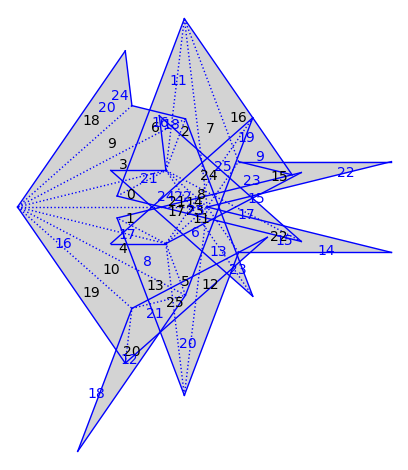

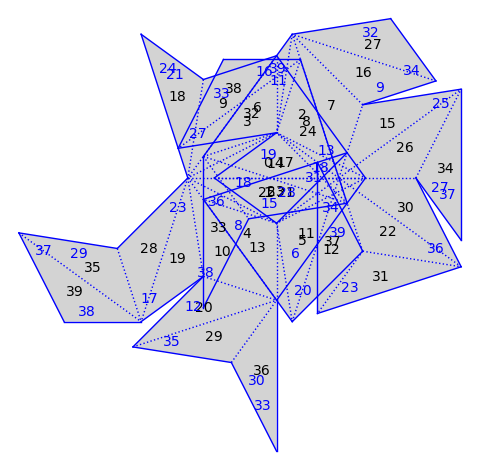

In [9]:
S_1_3_9_tr.plot().show(aspect_ratio=1)
S_3_4_13_tr.plot().show(aspect_ratio=1)

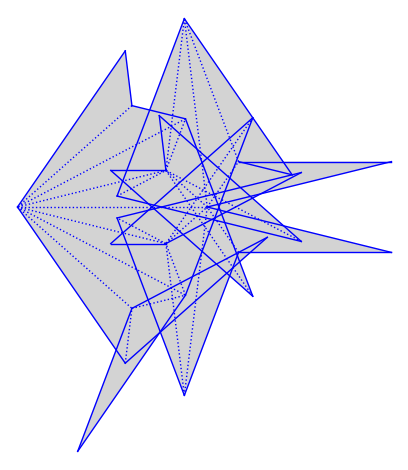

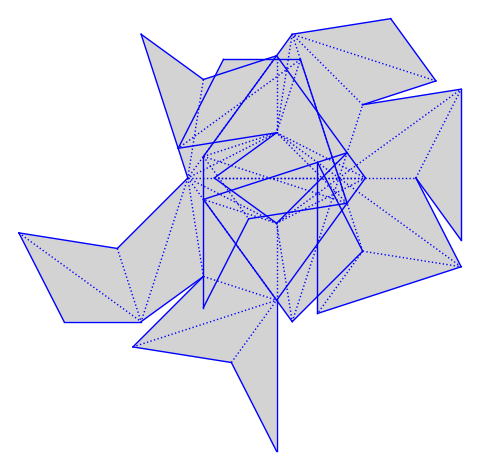

In [10]:
S_1_3_9_tr.plot(polygon_labels=False, edge_labels=False).show(aspect_ratio=1)
S_3_4_13_tr.plot(polygon_labels=False, edge_labels=False).show(aspect_ratio=1)

In [11]:
v = S_3_4_13_tr.tangent_vector(0, (1/2, 1/8), (1,1))
L = v.straight_line_trajectory()
L.flow(100)
L.is_closed()

True

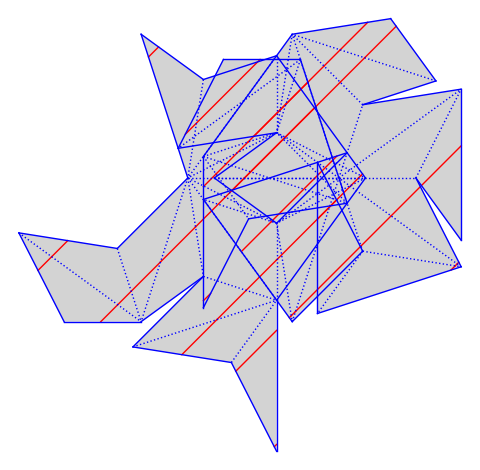

In [12]:
(L.plot(color='red') + S_3_4_13_tr.plot(polygon_labels=False, edge_labels=False)).show(aspect_ratio=1)

## Saturate with cylinder deformations (lower bound for GL(2,R)-orbit closure)

In [21]:
from flatsurf import GL2ROrbitClosure

In [19]:
O_1_3_9 = GL2ROrbitClosure(S_1_3_9_tr.erase_marked_points())

In [14]:
for decomposition in itertools.islice(O_1_3_9.decompositions(4, limit=50), 50):
    O_1_3_9.update_tangent_space_from_flow_decomposition(decomposition)
    print(O_1_3_9.dimension(), end=' ')

7 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 

In [18]:
S_1_3_9_tr.erase_marked_points().stratum().dimension()

13

In [ ]:
O_3_4_13 = GL2ROrbitClosure(S_3_4_13_tr.erase_marked_points())

In [20]:
for decomposition in itertools.islice(O_3_4_13.decompositions(4), 50):
    O_3_4_13.update_tangent_space_from_flow_decomposition(decomposition)
    print(O_3_4_13.dimension(), end=' ')

3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

In [20]:
S_3_4_13_tr.erase_marked_points().stratum().dimension()

17

## Computing cell-decomposition

We explore the discriminant locii in $\mathcal{H}(1,1)$.

In [1]:
from veerer.linear_family import VeeringTriangulationLinearFamilies

In [60]:
D = 5
while D < 20:
    if D % 8 == 1:
        spins = [True, False]
    else:
        spins = [None]
    for spin in spins:
        print('D={} spin={}'.format(D, spin))
        prototypes = list(VeeringTriangulationLinearFamilies.H2_prototype_parameters(D, spin))
        print(' {} prototypes'.format(len(prototypes)))
        if not prototypes:
            continue
        vt = VeeringTriangulationLinearFamilies.prototype_H1_1(*prototypes[0], mutable=True)
        while not vt.is_geometric():
            vt.random_forward_flip()
        print(' ', vt.geometric_automaton())
    if D % 4 == 0:
        D += 1
    else:
        D += 3

D=5 spin=None
 1 prototypes
  Geometric veering linear constraint automaton with 632 vertices
D=8 spin=None
 3 prototypes
  Geometric veering linear constraint automaton with 1938 vertices
D=9 spin=True
 0 prototypes
D=9 spin=False
 1 prototypes
  Geometric veering linear constraint automaton with 1244 vertices
D=12 spin=None
 4 prototypes
  Geometric veering linear constraint automaton with 5024 vertices
D=13 spin=None
 3 prototypes
  Geometric veering linear constraint automaton with 5372 vertices
D=16 spin=None
 3 prototypes
  Geometric veering linear constraint automaton with 4942 vertices
D=17 spin=True
 3 prototypes
  Geometric veering linear constraint automaton with 10628 vertices
D=17 spin=False
 3 prototypes
  Geometric veering linear constraint automaton with 10628 vertices
